In [111]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


In [112]:
#loading data
data = pd.read_csv('/content/Wholesale customers data.csv')

In [113]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [114]:
data.shape

(440, 8)

In [115]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [116]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [117]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

data doesnot need to be sclaed as it falls in the same scale range

In [118]:
data.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [119]:
#checking missing values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [120]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [121]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [122]:
x =data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [123]:
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


**CLUSTERING:**

In [124]:
#KMeans clustering
from sklearn.cluster import KMeans

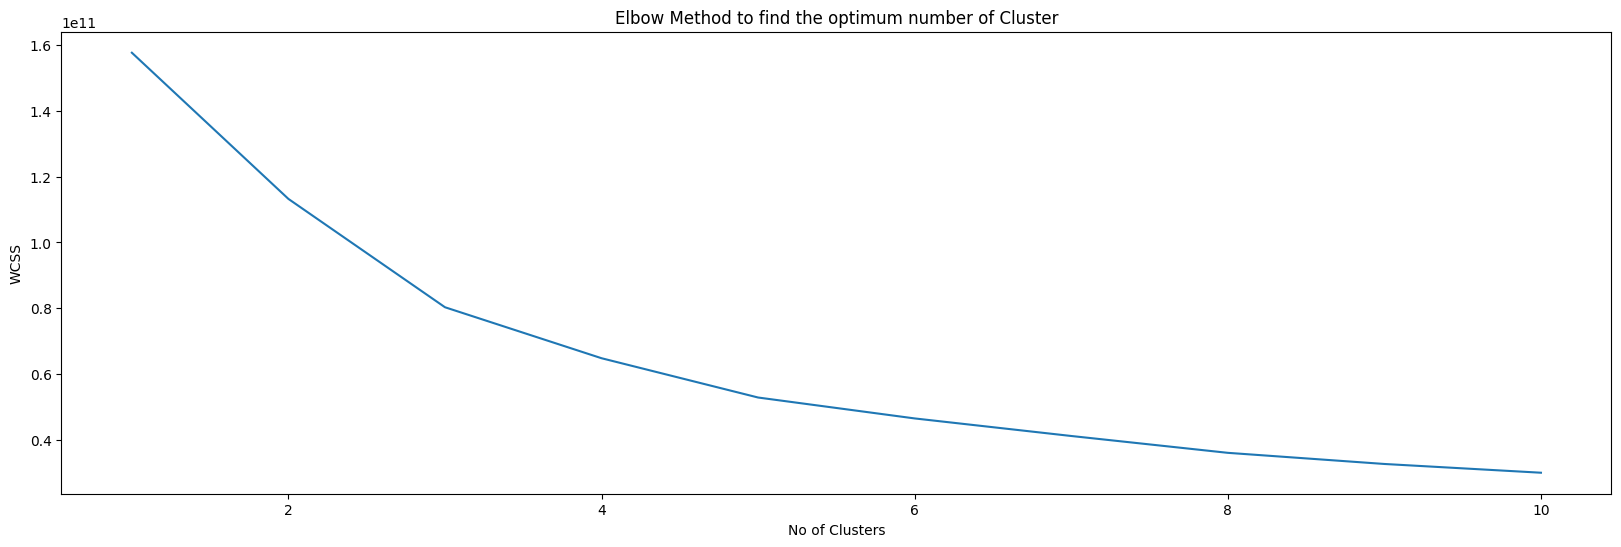

In [125]:
wcss =[]
for i in range(1,11):
  km= KMeans(n_clusters=i,n_init =20)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)
plt.subplots(figsize=(20,6))
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to find the optimum number of Cluster')
plt.show()

In [126]:
km= KMeans(n_clusters=3,n_init =20)

In [127]:
km.fit(x)

KMeans(n_clusters=3, n_init=20)

In [128]:
cluster_labels = km.predict(x)

In [129]:
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [130]:
pd.Series(cluster_labels).value_counts()

0    330
1     60
2     50
dtype: int64

In [131]:
from sklearn.metrics import silhouette_score

In [132]:
sil_avg=silhouette_score(data,cluster_labels)
print('The Silhouette Scoure for Cluster number = 3 is',sil_avg)

The Silhouette Scoure for Cluster number = 3 is 0.4783511411368133


In [133]:
#the bend in the elbow is found at 3 ,so the optimum number of clusters in this clustering method is 3

In [134]:
#Aggolmetric Clustering
data1=data

In [135]:
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [136]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [137]:
mergings = linkage(x,method = "ward")

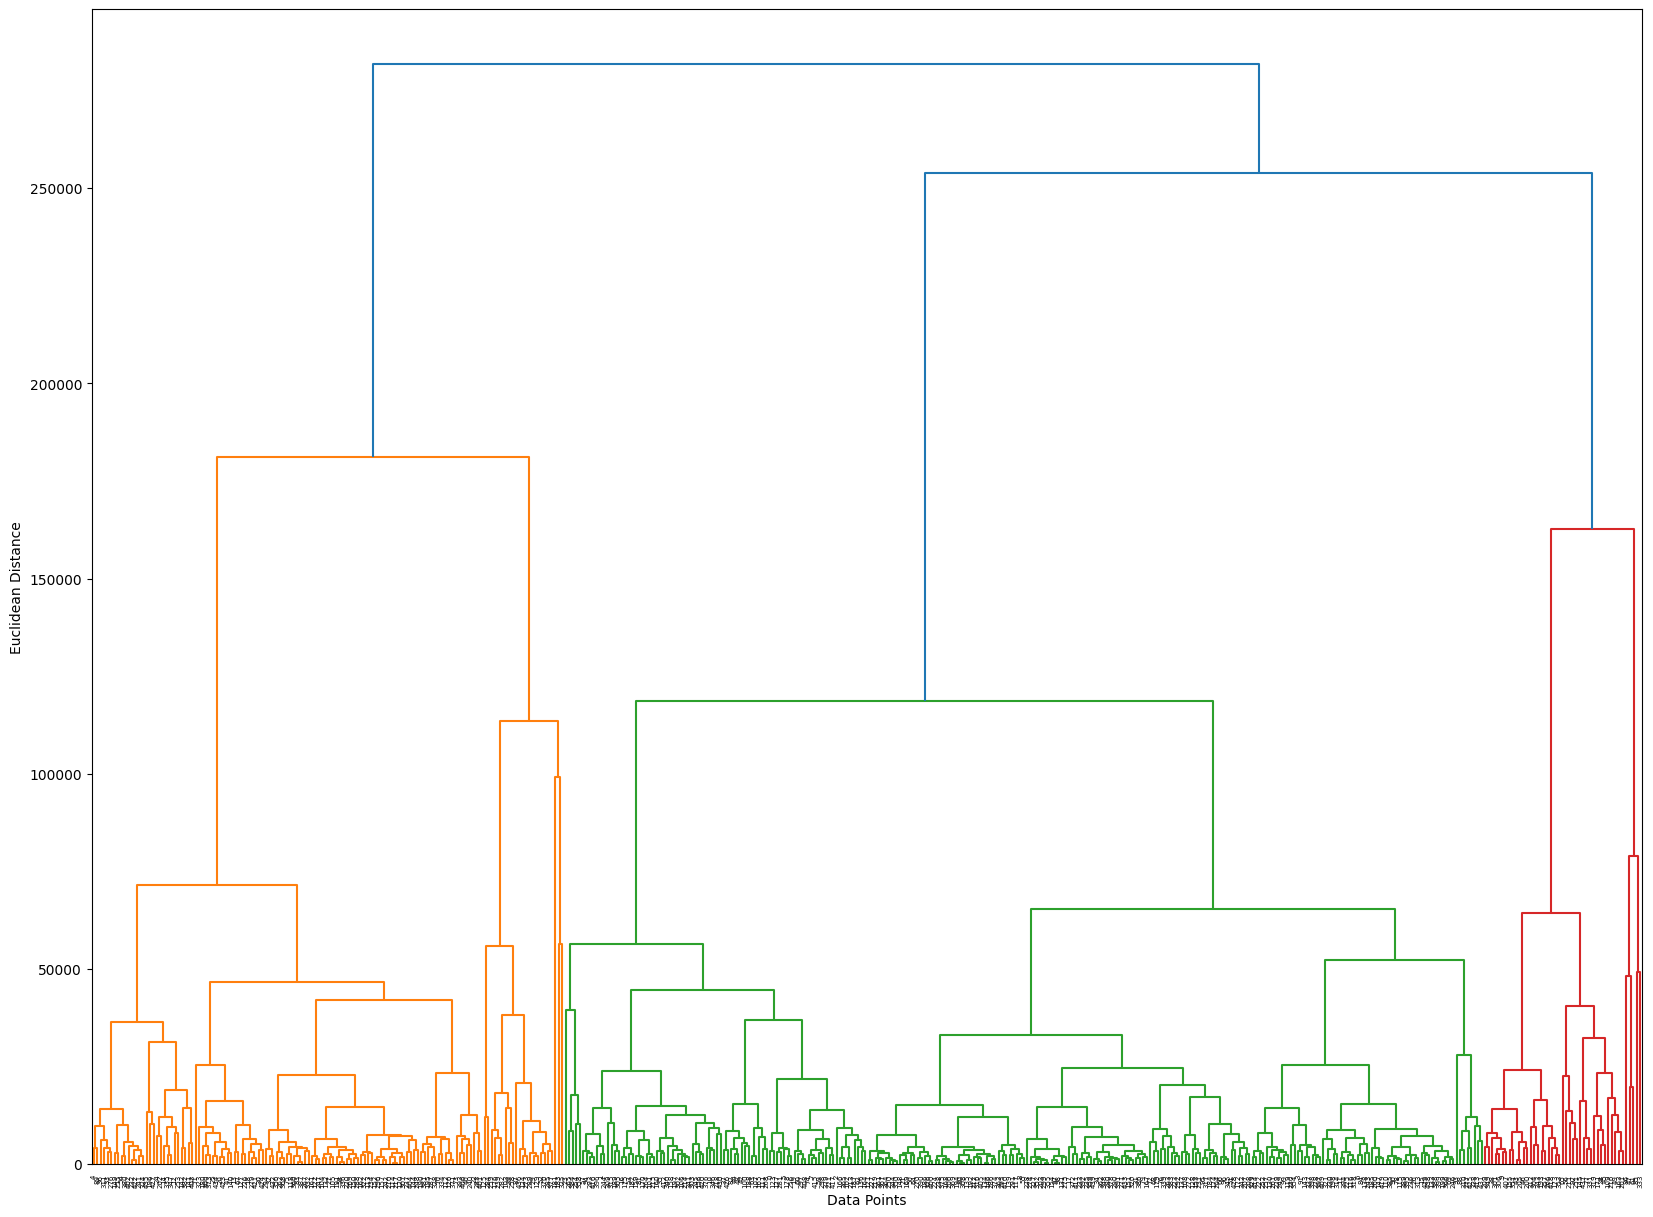

In [138]:
plt.figure(figsize=(20,15))
dendrogram(mergings)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
plt.show()

In [139]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [140]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [141]:
sil_avg=silhouette_score(data,y_hc)
print('The Silhouette Scoure AgglomerativeClustering',sil_avg)

The Silhouette Scoure AgglomerativeClustering 0.3447187623823024


In [161]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
data_mm=mm.fit_transform(data)
data_mm=pd.DataFrame(data_mm,columns=data.columns)
data_mm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [142]:
#PCA for Dimensionality reduciton

In [162]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca_array1=pca.fit_transform(data_mm)
pca_array1

array([[ 0.68616217, -0.14344337, -0.10626717],
       [ 0.6929776 , -0.14111741, -0.10179424],
       [ 0.69063805, -0.14221857, -0.09214034],
       ...,
       [ 0.77594569, -0.12580099,  0.19639707],
       [-0.30340913, -0.26997382, -0.04043218],
       [-0.29943697, -0.26765313, -0.07792189]])

In [163]:
pca_data1=pd.DataFrame(pca_array1,columns=["pc1","pc2","pc3"])
pca_data1

,pc1,pc2,pc3
0,0.686162,-0.143443,-0.106267
1,0.692978,-0.141117,-0.101794
2,0.690638,-0.142219,-0.092140
3,-0.304239,-0.270145,-0.001856
4,0.671296,-0.148007,-0.081052
...,...,...,...
435,-0.281904,-0.269205,0.220292
436,-0.318431,-0.277468,0.071273
437,0.775946,-0.125801,0.196397
438,-0.303409,-0.269974,-0.040432


In [164]:
#checking correlation
pca_data1.corr().round(1)

,pc1,pc2,pc3
pc1,1.0,0.0,-0.0
pc2,0.0,1.0,-0.0
pc3,-0.0,-0.0,1.0


In [165]:
#cheking variance
pca.explained_variance_

array([0.23363946, 0.14853705, 0.01863653])

In [166]:
pca.explained_variance_ratio_*100

array([54.88078792, 34.89064028,  4.37763215])

In [168]:
sum([54.88078792+ 34.89064028+  4.37763215])

94.14906035

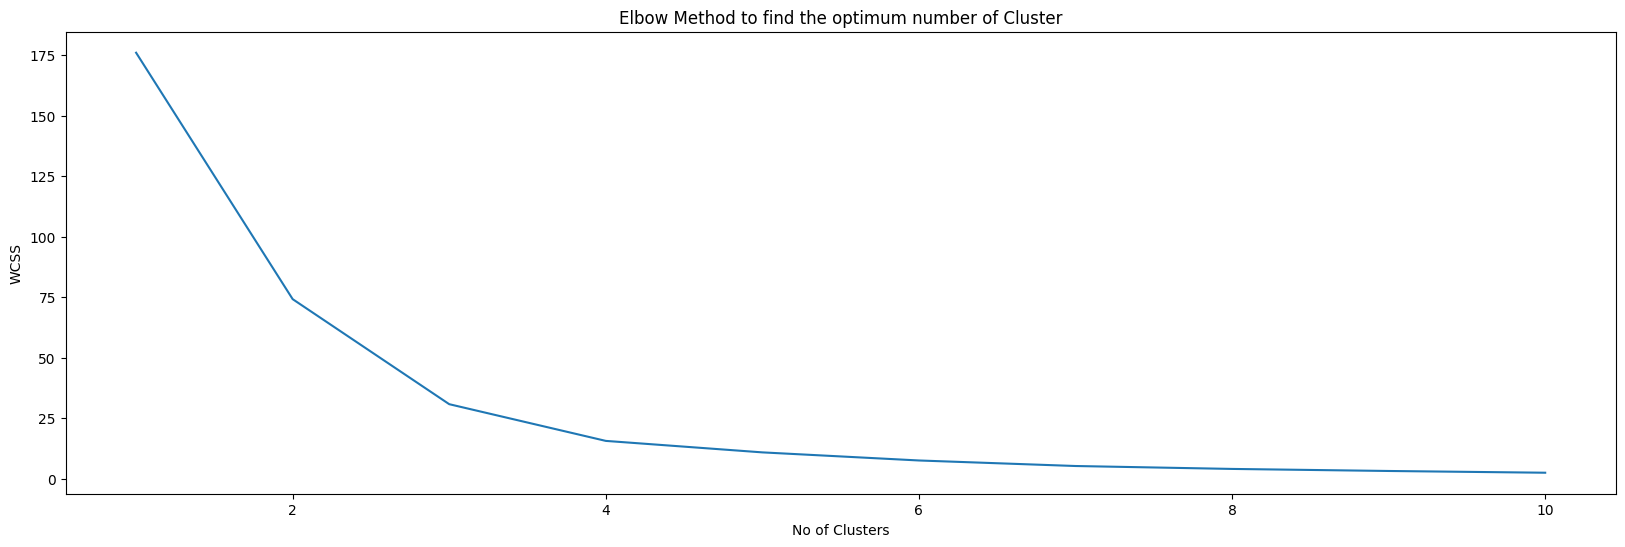

In [169]:
#KMeans Clustering After PCA
wcss =[]
for i in range(1,11):
  km= KMeans(n_clusters=i,n_init =20)
  km.fit(pca_array1)
  css = km.inertia_
  wcss.append(css)
plt.subplots(figsize=(20,6))
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to find the optimum number of Cluster')
plt.show()

In [170]:
km= KMeans(n_clusters=2,n_init =20)

In [171]:
km.fit(pca_array1)

KMeans(n_clusters=2, n_init=20)

In [172]:
cluster_labels1 = km.predict(pca_array1)

In [173]:
sil_avg=silhouette_score(data,cluster_labels)
print('The Silhouette Scoure for Cluster number = 2 is',sil_avg)

The Silhouette Scoure for Cluster number = 2 is 0.4783511411368133


In [174]:
#agglomarative after pca
mergings1 = linkage(pca_array1,method = "ward")

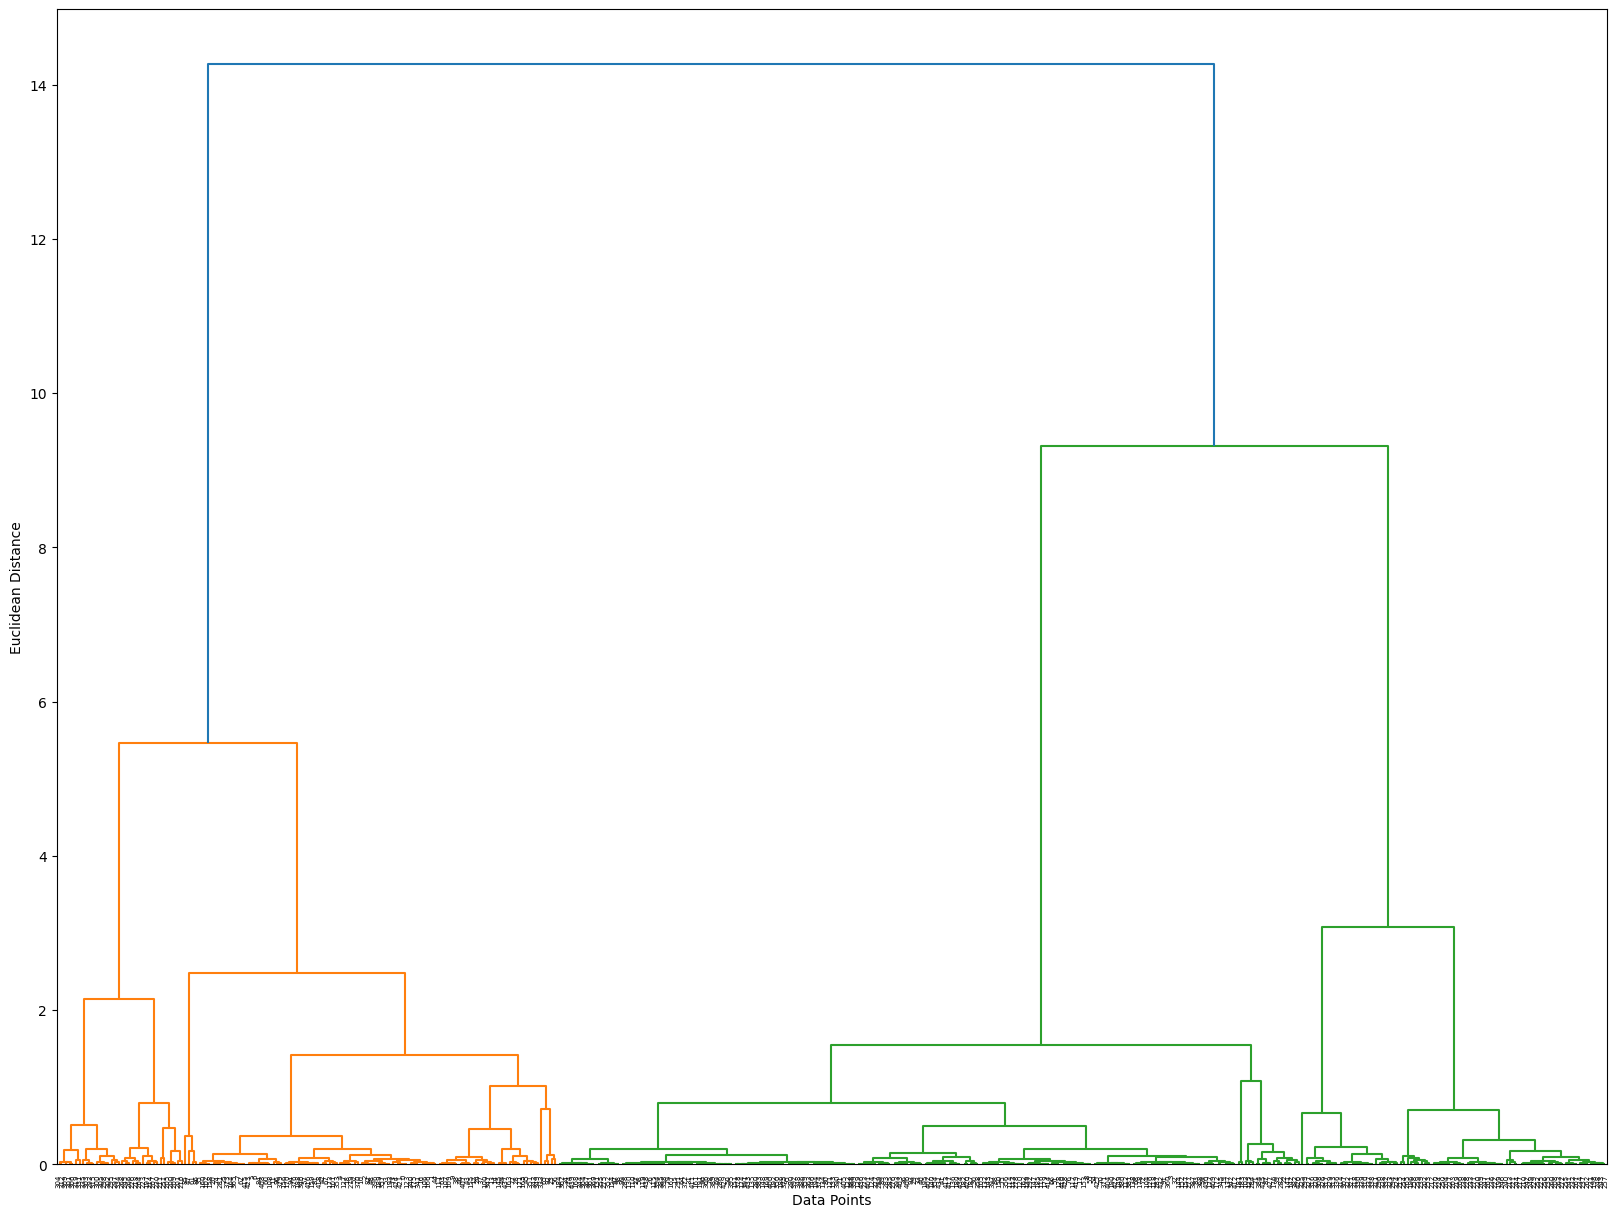

In [175]:
plt.figure(figsize=(20,15))
dendrogram(mergings1)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
plt.show()

In [176]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(pca_array1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [177]:
sil_avg=silhouette_score(pca_array1,y_hc)
print('The Silhouette Scoure AgglomerativeClustering',sil_avg)

The Silhouette Scoure AgglomerativeClustering 0.645377407410574


Here we have done the kmeans and agglomerative clustering before nd after performing PCA.
The Model which gived the best Silhouette Score is
AgglomerativeClustering model after PCA.

 Therefore the optimal number of clusters = 2